__Vulnérabilités Organisationnelles - Outil basé sur l'étude de cas__


Création des hyperespaces des danger pour chaque acteur

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def hyperespaces(a) :
    a = 5
    n = 5
    hyperespace_attendus, hyperespace_observes = np.full((a, n), 10), np.full((a, n), 0)
    return (hyperespace_attendus,hyperespace_observes)

hyperespace_attendus = hyperespaces(5)[0]
hyperespace_observes = hyperespaces(5)[1]

Evaluation des valeurs de chaque acteur sur les axes de l'hyperespace des observations. (On pourrait faire remplir un form à l'utilisateur et récpérer ses réponses sur un excel pour les traiter avec un programme python)

In [ ]:
for i in range(2) :
    finalites = input(f"Evaluez les finalités de l'acteur {i + 1} sur 10 : ")
    hyperespace_observes[i,0] = int(finalites)

    valeurs = input(f"Evaluez les valeurs de l'acteur {i + 1} sur 10 : ")
    hyperespace_observes[i,1] = int(valeurs)

    reglement = input(f"Evaluez le respect des règles de l'acteur {i + 1} sur 10 : ")
    hyperespace_observes[i,2] = int(reglement)

    faits_et_donnes = input(f"Evaluez les faits et données de l'acteur {i + 1} sur 10 : ")
    hyperespace_observes[i,3] = int(faits_et_donnes)

    modeles = input(f"Evaluez les utilisation des modèles de l'acteur {i + 1} sur 10 : ")
    hyperespace_observes[i,4] = int(modeles)

print("hyperespace observés : ")
print(hyperespace_observes)

hyperespace observés : 
[[4 9 7 6 5]
 [9 3 5 1 4]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


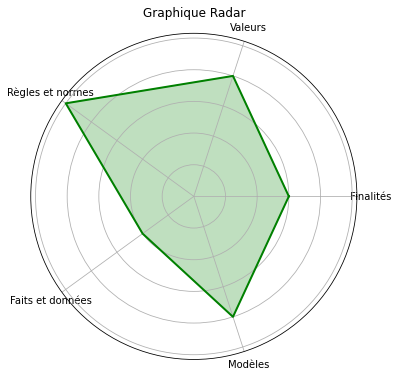

In [35]:
labels = ["Finalités", "Valeurs", "Règles et normes", "Faits et données", "Modèles"]
values = hyperespace_observes[0, :]
num_vars = len(labels)

# Calculer les angles pour chaque axe
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Fermer le graphique en ajoutant la première valeur et l'angle au début
values = np.concatenate((values, [values[0]]))  # Ajoutez la première valeur à la fin
angles += angles[:1]  # Ajoutez le premier angle à la fin

# Initialiser le graphique
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dessiner les lignes et remplir l'intérieur
ax.fill(angles, values, color='green', alpha=0.25)
ax.plot(angles, values, color='green', linewidth=2)

# Ajouter les étiquettes des axes
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Utilisez angles[:-1] pour éviter l'étiquette répétée
ax.set_xticklabels(labels)

# Afficher le graphique
plt.title('Graphique Radar')
plt.show()


On identifie maintenant les déficits de chaque acteur. c'est à dire la différence entre attendus et observés.

In [10]:
matrice_deficits = hyperespace_attendus - hyperespace_observes
print("Matrice des déficits: ")
print(matrice_deficits)

Matrice des déficits: 
[[ 6  1  3  4  5]
 [ 1  7  5  9  6]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


Ensuite on établit une matrice de dissonances pour chaque acteur. Les autres acteurs sont sur les lignes et les axes sur les colonnes.

In [11]:
dissonances = {}
for i in range (len(hyperespace_attendus)) :
    mat = hyperespace_observes - hyperespace_observes[i]
    dissonances[i] = mat
    print(f"dissonances pour l'acteur {i + 1} : ")
    print(dissonances[i])

dissonances pour l'acteur 1 : 
[[ 0  0  0  0  0]
 [ 5 -6 -2 -5 -1]
 [-4 -9 -7 -6 -5]
 [-4 -9 -7 -6 -5]
 [-4 -9 -7 -6 -5]]
dissonances pour l'acteur 2 : 
[[-5  6  2  5  1]
 [ 0  0  0  0  0]
 [-9 -3 -5 -1 -4]
 [-9 -3 -5 -1 -4]
 [-9 -3 -5 -1 -4]]
dissonances pour l'acteur 3 : 
[[4 9 7 6 5]
 [9 3 5 1 4]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
dissonances pour l'acteur 4 : 
[[4 9 7 6 5]
 [9 3 5 1 4]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
dissonances pour l'acteur 5 : 
[[4 9 7 6 5]
 [9 3 5 1 4]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


On fixe alors un seuil à partir du quel on considère qu'il faut avertir l'utilisateur d'une vulnérabilité.

On traite les déficits et dissonances supérieurs ou égaux à 6.

In [20]:
def deficits_importants():
    a = len(matrice_deficits)
    n = 5
    M = np.full((a, n), 0)
    for i in range(a):
        for j in range(n):
            if matrice_deficits[i,j] >= 6 :
                M[i,j] = matrice_deficits[i,j]
    return M

print("Matrice des déficits importants à traiter : ", deficits_importants())

Matrice des déficits importants à traiter :  [[ 6  0  0  0  0]
 [ 0  7  0  9  6]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


In [28]:
def dissonances_importantes():
    dissonances_importantes = {}
    a = len(dissonances[0])
    n = 5
    for k in range(len(dissonances)):
        dissonances_importantes[k] = np.full((a, n), 0)
        for i in range(a):
            for j in range(n):
                if abs(dissonances[k][i,j]) >= 6 :
                    dissonances_importantes[k][i,j] = dissonances[k][i,j]
    return dissonances_importantes

for k in range(5):
    print(f"Matrice des dissonances importants à traiter pour l'acteur {i+1}: ", dissonances_importantes()[k])

Matrice des dissonances importants à traiter pour l'acteur 5:  [[ 0  0  0  0  0]
 [ 0 -6  0  0  0]
 [ 0 -9 -7 -6  0]
 [ 0 -9 -7 -6  0]
 [ 0 -9 -7 -6  0]]
Matrice des dissonances importants à traiter pour l'acteur 5:  [[ 0  6  0  0  0]
 [ 0  0  0  0  0]
 [-9  0  0  0  0]
 [-9  0  0  0  0]
 [-9  0  0  0  0]]
Matrice des dissonances importants à traiter pour l'acteur 5:  [[0 9 7 6 0]
 [9 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Matrice des dissonances importants à traiter pour l'acteur 5:  [[0 9 7 6 0]
 [9 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Matrice des dissonances importants à traiter pour l'acteur 5:  [[0 9 7 6 0]
 [9 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
